# Day 1: Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (13, 7)

from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import axes3d

pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_seq_items', None)

![source: github.com/Avik-Jain/100-Days-Of-ML-Code](figure/day1.jpg)
**source: github.com/Avik-Jain/100-Days-Of-ML-Code**

## 1 Simple Python Function

**warmUpExercise**

In [2]:
def warmUpExercise():
    '''Return a 5x5 identity matrix'''
    return (np.identity(5))

In [3]:
warmUpExercise()

array([[ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1.]])

## 2 Linear Regression with One Variable

In this part of this exercise, you will implement linear regression with one variable to predict profits for a food truck. Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities.

You would like to use this data to help you select which city to expand to next.

The file **ex1data1.txt** contains the dataset for our linear regression problem. The first column is the population of a city and the second column is the profit of a food truck in that city. A negative value for profit indicates a loss.

In [4]:
# Load the data
path = 'data/ex1data1.txt'
data = np.loadtxt(path, delimiter=',')
X = np.c_[np.ones(data.shape[0]), data[:,0]] # training set
y = np.c_[data[:,1]] # target set
print(X.shape)
print(X[:5])
print()
print(y.shape)
print(y[:5])

(97, 2)
[[ 1.      6.1101]
 [ 1.      5.5277]
 [ 1.      8.5186]
 [ 1.      7.0032]
 [ 1.      5.8598]]

(97, 1)
[[ 17.592 ]
 [  9.1302]
 [ 13.662 ]
 [ 11.854 ]
 [  6.8233]]


### 2.1 Plotting the Data

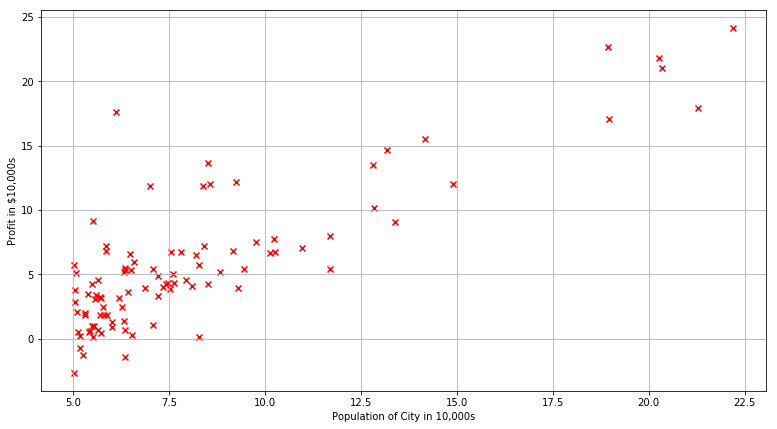

In [5]:
# Visualization
plt.scatter(X[:, 1], y, c='r', marker='x')
plt.grid(True)
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of City in 10,000s')
plt.show();

### 2.2 Gradient Descent

In this part, you will fit the linear regression parameters $\theta$ to our dataset using gradient descent.

The objective of linear regression is to minimize the cost function
![cost](figure/cost-function-of-linear-regression.jpg)
Where the hypothesis $h_\theta(x)$ is given by the linear model
![hypothesis](figure/hypothesis-of-simple-linear-regression.jpg)
In batch gradient descent, each iteration performs the update
![gd](figure/gradient-descent-of-linear-regression.jpg)

In [6]:
def h(X, theta):
    '''Hypothesis function.
    Paramters:
        X: training set, which is matrix with m-rows and n-columns
        theta: parameters of the model, which is an n-vector
    Return: hypothesis value is m-vector.'''
    return np.dot(X, theta)

def computeCost(X, y, theta):
    '''Cost function.
    Parameters:
        X: training set, which is matrix with m-rows and n-columns 
        y: target set, which is a matrix with m-rows and 1-columns
        theta: parameters of the model, which is an n-vector
    Return: cost value is scalar.'''
    m = X.shape[0]
    return np.float(1/(2*m)) * np.sum(np.square(h(X, theta) - y))

# Test that running computeCost with 0's as theta returns 32.07:
initial_theta = np.zeros((X.shape[1], 1))
print(computeCost(X, y, initial_theta))

def gradientDescent(X, y, theta=[[0], [0]], alpha=0.01, num_iters=1500):
    '''Compute Gradient Descent process.
    Parameters:
        X: training set, which is matrix with m-rows and n-columns
        y: target set, which is a matrix with m-rows and 1-columns
        theta: parameters of the model, which is an n-vector
        alpha: learning rate
        num_iters: the number of iterations
    Return: (the final value of theta, history of Cost function value).'''
    m = X.shape[0]
    J_history = np.zeros(num_iters)
    
    for iter in range(num_iters):
        J_drvt = np.float(1/m) * X.T.dot(h(X, theta) - y)
        theta -= alpha * J_drvt
        J_history[iter] = computeCost(X, y, theta)

    return (theta, J_history)

32.0727338775


The optima value of theta:  [-3.63029144  1.16636235]


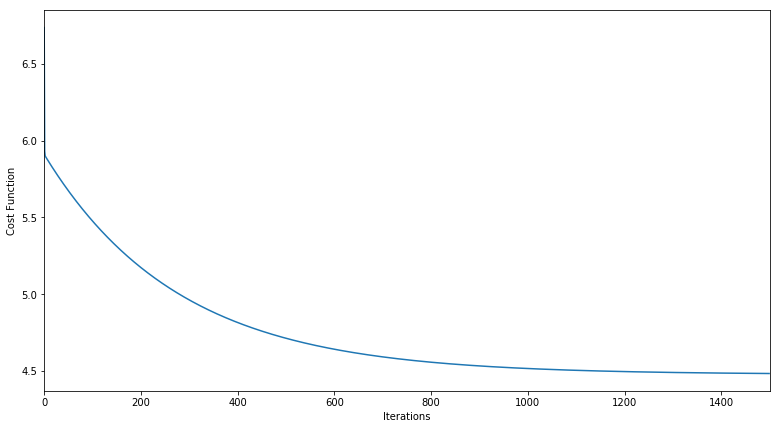

In [7]:
# Compute theta to minimize the Cost J
theta, J_hist = gradientDescent(X, y)
print('The optima value of theta: ', theta.ravel())
# Plot the convergence of the cost function
def plotConv(J_hist):
    plt.plot(J_hist)
    plt.xlim(0, 1500)
    plt.ylabel('Cost Function')
    plt.xlabel('Iterations')
    plt.show();

plotConv(J_hist)

In [8]:
# Predict profit for a city with polulation of 35000 and 70000 people
x1 = [1, 3.5]
x2 = [1, 7]
print('Profit of the city have 35000 people:', h(x1, theta) * 10000)
print('Profit of the city have 70000 people:', h(x2, theta) * 10000)

Profit of the city have 35000 people: [ 4519.7678677]
Profit of the city have 70000 people: [ 45342.45012945]


### 2.3 Debugging

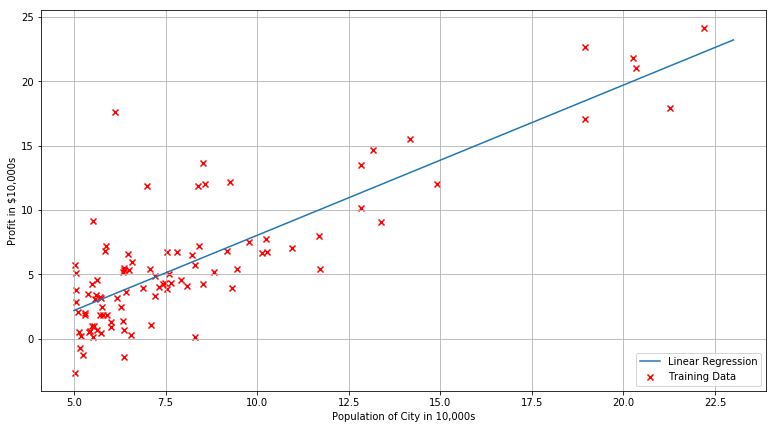

In [9]:
# Plot the line on top of the data
xx = np.arange(5,24)
yy = theta[0] + theta[1]*xx

plt.scatter(X[:, 1], y, c='r', marker='x', label='Training Data')
plt.plot(xx, yy, label='Linear Regression')
plt.grid(True)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.legend(loc=4)
plt.show();

### 2.4 Visualizing $J(\theta)$

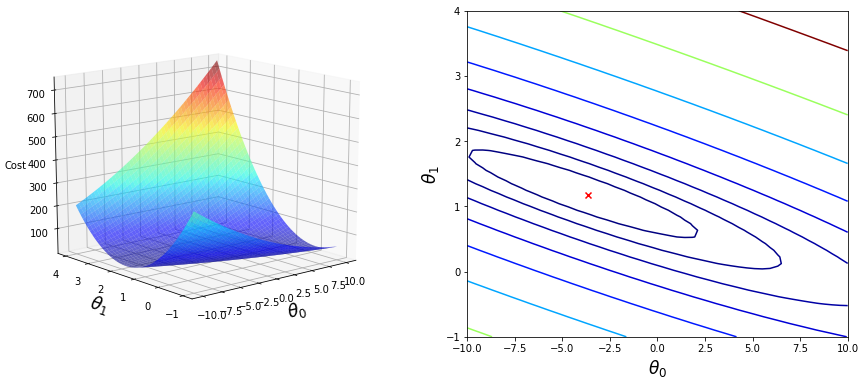

In [10]:
# Create grid coordinates for plotting
B0 = np.linspace(-10, 10, 50)
B1 = np.linspace(-1, 4, 50)
xx, yy = np.meshgrid(B0, B1, indexing='xy')
Z = np.zeros((B0.size, B1.size))

# Calculate Z-values (Cost) based on grid of coefficients
for (i,j),v in np.ndenumerate(Z):
    Z[i,j] = computeCost(X,y, theta=[[xx[i,j]], [yy[i,j]]])

fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122)

# Left plot
ax1.plot_surface(xx, yy, Z, rstride=1, cstride=1, alpha=0.6, cmap=plt.cm.jet)
ax1.set_zlabel('Cost')
ax1.set_zlim(Z.min(),Z.max())
ax1.view_init(elev=15, azim=230)

# Right plot
CS = ax2.contour(xx, yy, Z, np.logspace(-2, 3, 20), cmap=plt.cm.jet)
ax2.scatter(theta[0],theta[1], c='r', marker='x')

# settings common to both plots
for ax in fig.axes:
    ax.set_xlabel(r'$\theta_0$', fontsize=17)
    ax.set_ylabel(r'$\theta_1$', fontsize=17)

## Optional Exercises

## 3 Linear Regression with Multiple Variables

In this part, you will implement linear regression with multiple variables to predict the prices of houses. Suppose you are selling your house and you want to know what a good market price would be. One way to do this is to first collect information on recent houses sold and make a model of housing prices.

The file **ex1data2.txt** contains a training set of housing prices in Portland, Oregon. The first column is the size of the house (in square feet), the second column is the number of bedrooms, and the third column is the price of the house.

In [11]:
# Load the data
path = 'data/ex1data2.txt'
data = np.loadtxt(path, delimiter=',')
X = np.c_[np.ones(data.shape[0]), data[:, :2]] # training set
y = np.c_[data[:, -1]] # target set

print(X.shape)
print(X[:5])
print()
print(y.shape)
print(y[:5])

(47, 3)
[[  1.00000000e+00   2.10400000e+03   3.00000000e+00]
 [  1.00000000e+00   1.60000000e+03   3.00000000e+00]
 [  1.00000000e+00   2.40000000e+03   3.00000000e+00]
 [  1.00000000e+00   1.41600000e+03   2.00000000e+00]
 [  1.00000000e+00   3.00000000e+03   4.00000000e+00]]

(47, 1)
[[ 399900.]
 [ 329900.]
 [ 369000.]
 [ 232000.]
 [ 539900.]]


### 3.1 Feature Normalization

In [12]:
# Store the mean and std for later use
means, stds = [], []
# Can't modify the original X matrix, so should create a copy of it
X_norm = X.copy()

# Feature normalization the columns (substract mean, divide by standard deviation)
for icol in range(X_norm.shape[1]):
    means.append(X_norm[:, icol].mean())
    stds.append(X_norm[:, icol].std())
    # Skip the first column
    if not icol:
        continue
    X_norm[:, icol] = (X_norm[:, icol] - means[-1]) / stds[-1]

X_norm[:5]

array([[ 1.        ,  0.13141542, -0.22609337],
       [ 1.        , -0.5096407 , -0.22609337],
       [ 1.        ,  0.5079087 , -0.22609337],
       [ 1.        , -0.74367706, -1.5543919 ],
       [ 1.        ,  1.27107075,  1.10220517]])

### 3.2 Gradient Descent

In the multivariate case, The hypothesis function and the batch gradient descent update rule remain unchanged. The cost function can also be written in the following vectorized form:
![vectorized](figure/vectorized-multivariate-linear-regression.jpg)

In [13]:
# Gradient Descent with mulvariate, initial theta still set to zeros
theta = np.zeros((X_norm.shape[1], 1))
op_theta, J_hist = gradientDescent(X_norm, y, theta=theta)
op_theta.ravel()

array([ 340412.56301439,  109370.05670466,   -6500.61509507])

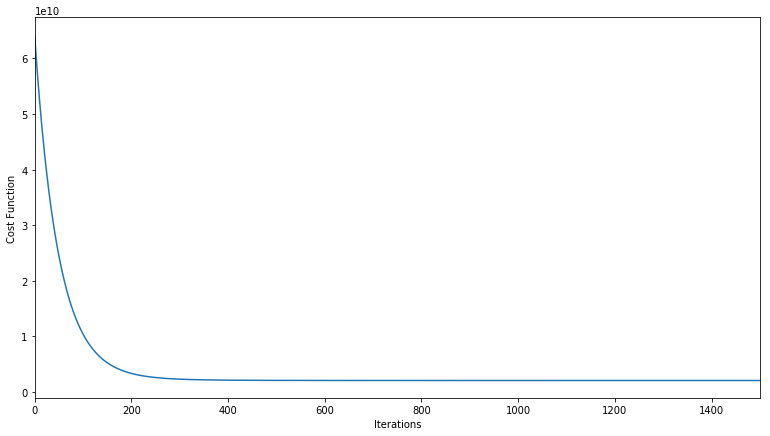

In [14]:
# Plot the convergence of the cost function
plotConv(J_hist)

Predict the price of a house with 1650 square feet and 3 bedrooms

In [15]:
X_test = np.array([1650, 3])
X_test_scaled = [(X_test[i] - means[i+1]) / stds[i+1] for i in range(len(X_test))]
X_test_scaled.insert(0,1)
print('The Price of a house with 1650 square feet and 3 bedrooms:', h(X_test_scaled, theta))

The Price of a house with 1650 square feet and 3 bedrooms: [ 293098.46667577]


### 3.3 Normal Equations

The closed-form solution to linear regression is
![normal-equations](figure/normal-equations.jpg)
Using this formula does not require any feature scaling, and you will get an exact solution in one calculation: there is no "loop until convergence" like in gradient descent.

In [16]:
def normalEqn(X, y):
    '''Compute Normal Equation for Linear Regression model.
    Parameters:
        X: training set, which is matrix with m-rows and n-columns 
        y: target set, which is a matrix with m-rows and 1-columns
    Return:
        theta: the parameter of model, which is n-vector'''
    return np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)

In [17]:
# Make prediction using Normal Equation
x = np.array([1, 1650, 3])
print('A price prediction for a 1650-square-foot house with 3 bedrooms:', h(x, normalEqn(X, y)))

A price prediction for a 1650-square-foot house with 3 bedrooms: [ 293081.46433489]
